# 

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("result.csv")
df.head()

,rc_ty,url,author,closer,auther_is_closer,participants_total,participants_bot,participants_member,participants_contributer,participants_user,create_time,life_time_sec,first_event_time_sec,first_comment_time_sec,commit_count,comment_count,end
0,Issue,"""https://github.com/guzzle/guzzle/issues/3221""",User,Member,False,2,0,1,0,1,2024-05-29 14:39:44 +00:00,2384,-1,2384,0,1,Green
1,Issue,"""https://github.com/guzzle/guzzle/issues/3217""",User,Member,False,2,0,1,0,1,2024-05-04 10:35:18 +00:00,1229,-1,1229,0,1,Green
2,Issue,"""https://github.com/guzzle/guzzle/issues/3216""",User,Member,False,2,0,1,0,1,2024-05-02 19:19:27 +00:00,8868,-1,8868,0,2,Green
3,PR,"""https://github.com/guzzle/guzzle/pull/3213""",User,User,True,1,0,0,0,1,2024-03-31 21:33:43 +00:00,209,-1,-1,2,0,Green
4,PR,"""https://github.com/guzzle/guzzle/pull/3212""",User,User,True,1,0,0,0,1,2024-03-31 21:32:34 +00:00,217,-1,-1,2,0,Green


In [211]:
df['bot_ratio'] = df.apply(lambda row: row.participants_bot / row.participants_total , axis=1 )
df['has_bot'] = df.apply(lambda row: row.participants_bot > 0 , axis=1 )
df['life_day'] = df.apply(lambda row: row.life_time_sec / (60 * 60 * 24 ) , axis=1 )
df['idle_time'] = df.apply(lambda row: ( (row.first_comment_time_sec  + 1 ) / (row.life_time_sec + 1) ) , axis=1 )

In [212]:
dfs = df.sort_values(by=['life_day','idle_time'])
iss = dfs[(dfs["rc_ty"]=="Issue") & (dfs["life_time_sec"] >= 0)]
prs = dfs[(dfs["rc_ty"]=="PR") & (dfs["life_time_sec"] >= 0)]

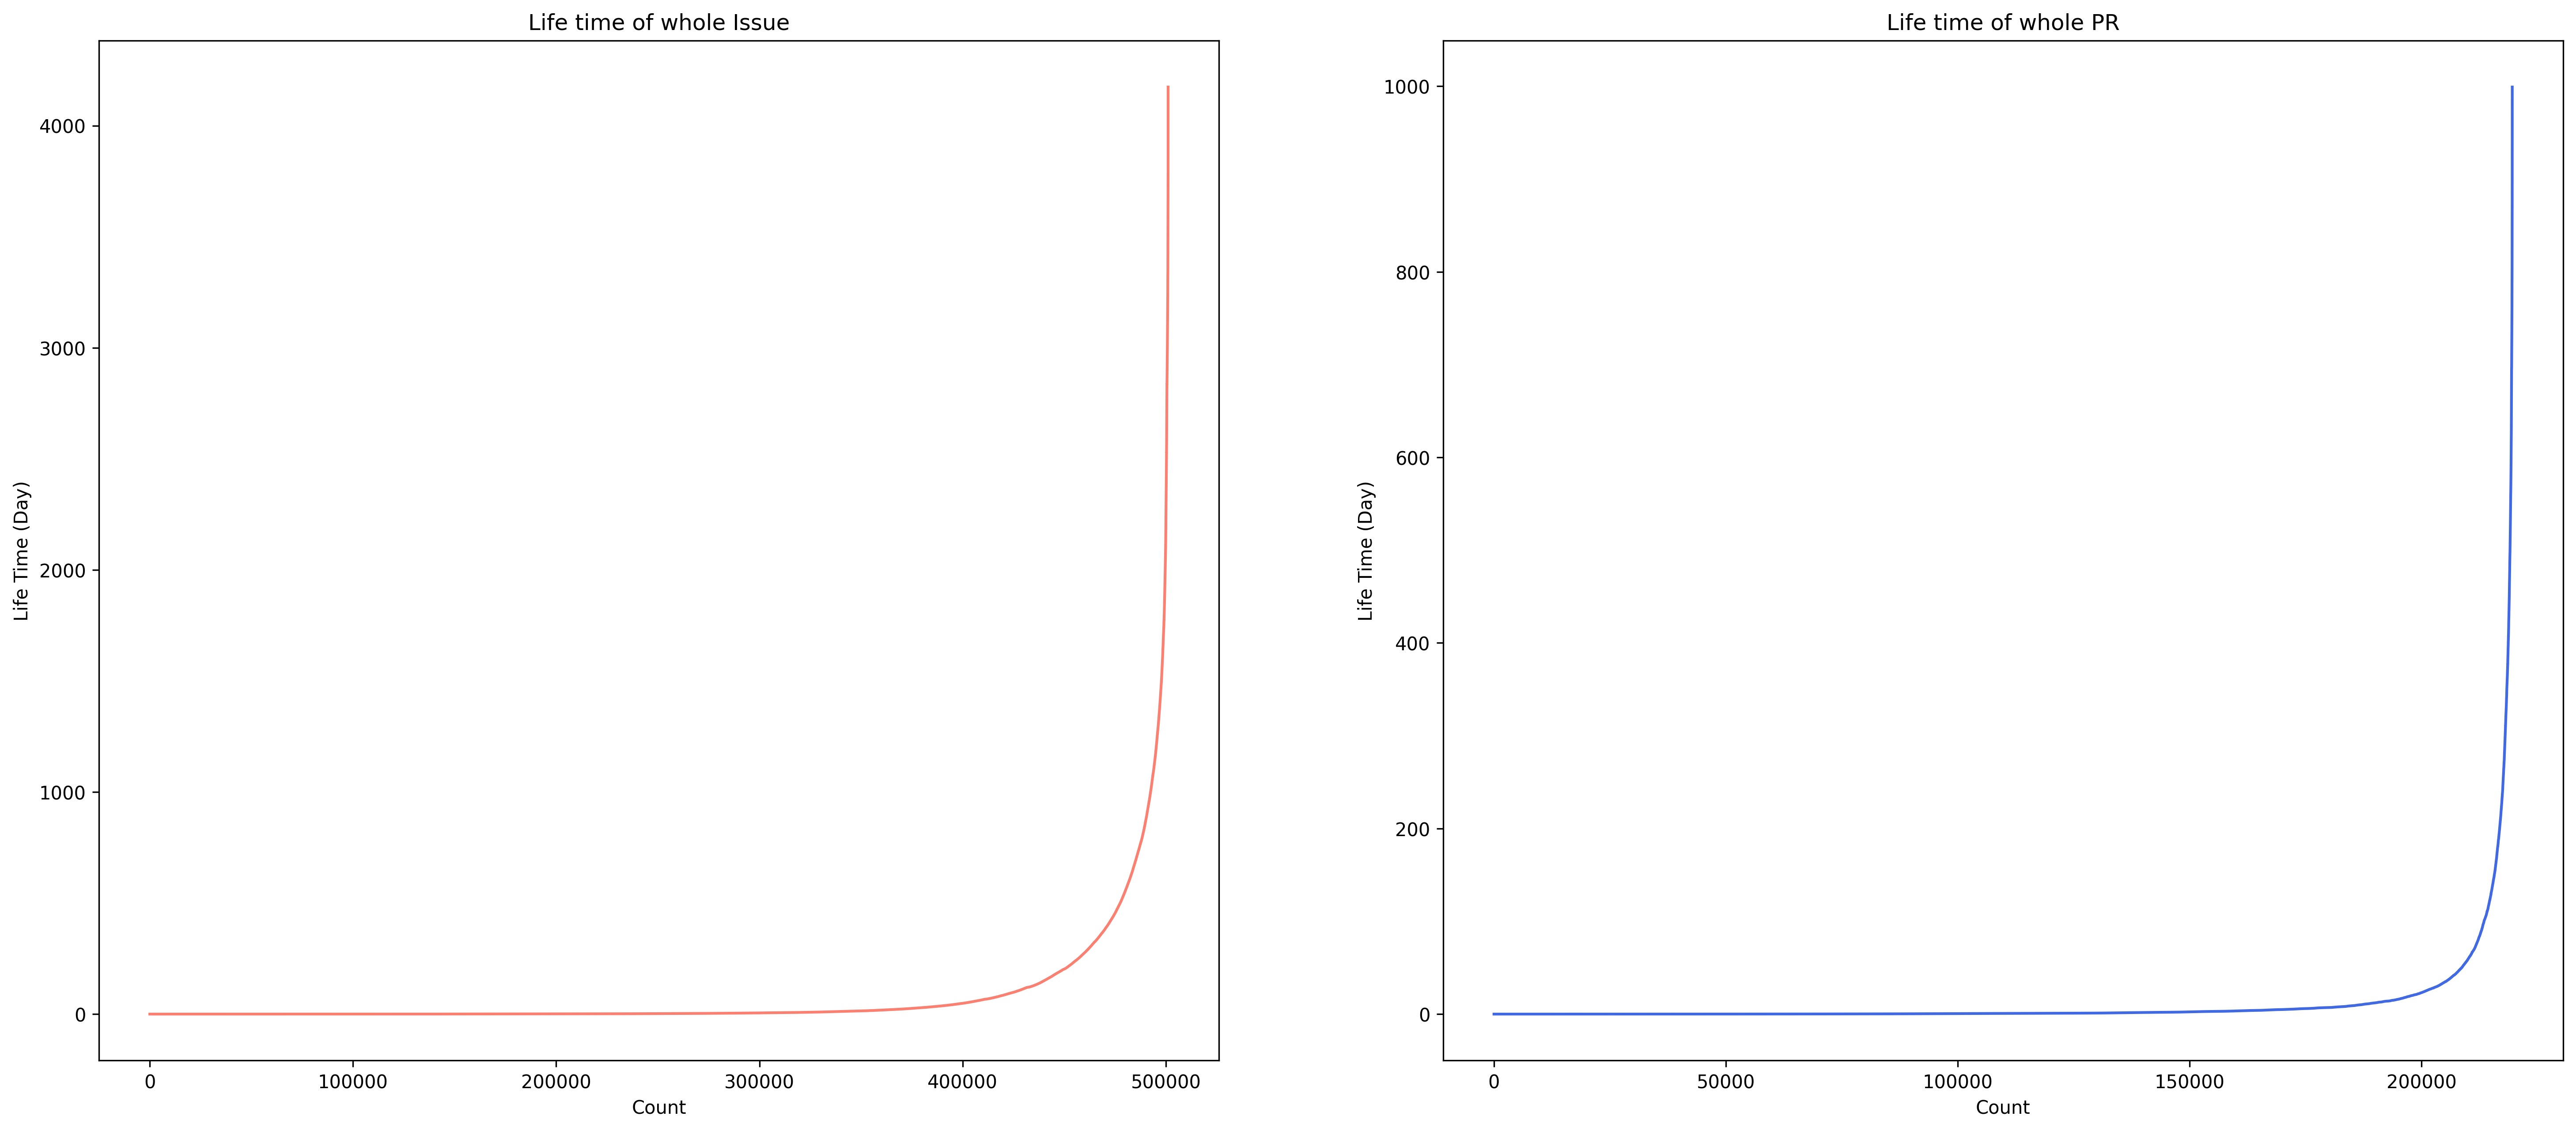

In [213]:
fig = plt.figure(figsize=(24,10),dpi=300)
l1  = fig.add_subplot(1,2,1)
r1  = fig.add_subplot(1,2,2)

def draw_lifetime_whole(df: pd.DataFrame,pl,name:str,color:str):
    xi = list(range(len(df)))
    pl.set_title(f"Life time of whole {name}")
    pl.set_xlabel("Count")
    pl.set_ylabel("Life Time (Day)")
    pl.plot(xi,df['life_day'],color=color)

draw_lifetime_whole(iss,l1,"Issue","salmon")
draw_lifetime_whole(prs,r1,"PR","royalblue")

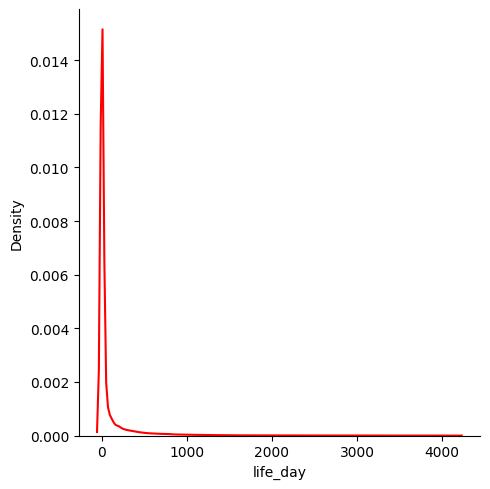

In [214]:
sns.displot(data = iss,kind="kde", x="life_day", color = 'red')

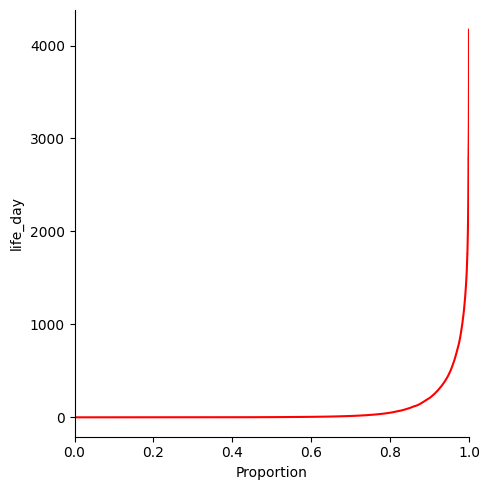

In [215]:
sns.displot(data = iss,kind="ecdf", y="life_day", color = 'red')

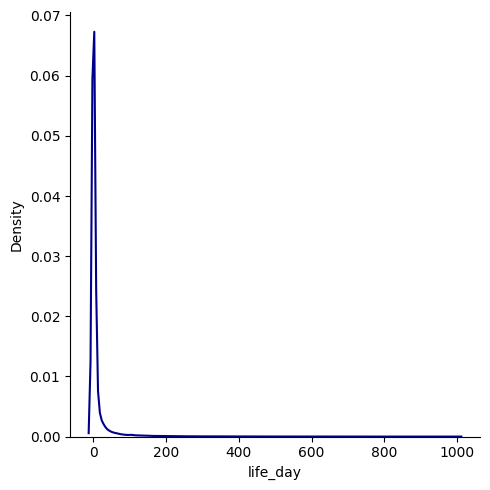

In [216]:
sns.displot(data = prs,kind="kde", x="life_day", color = 'darkblue')

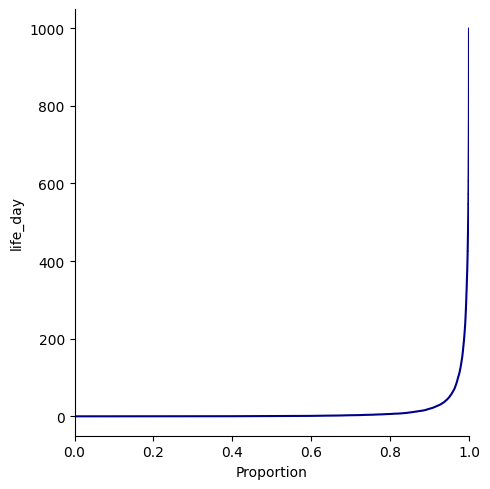

In [217]:
sns.displot(data = prs,kind="ecdf", y="life_day", color = 'darkblue')

In [218]:
len(iss)

501129

In [219]:
iss_mid=iss[(iss["life_day"] < 100)]
len(iss_mid)

425731

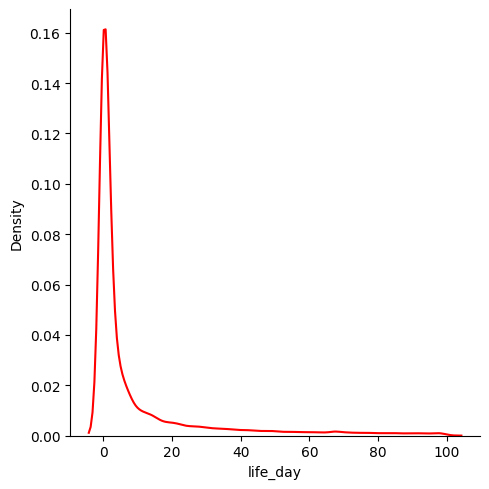

In [220]:
sns.displot(data = iss_mid,kind="kde", x="life_day", color = 'red')

In [221]:
iss_low=iss[(iss["life_day"] < 14)]
len(iss_low)

348679

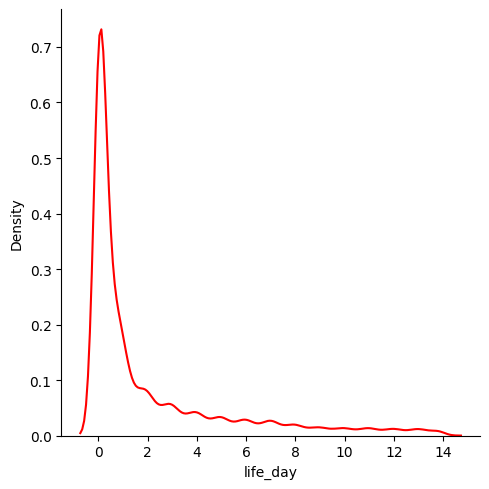

In [222]:
sns.displot(data = iss_low,kind="kde", x="life_day", color = 'red')

In [223]:
iss_vlow=iss[(iss["life_day"] < 3)]
len(iss_vlow)

270177

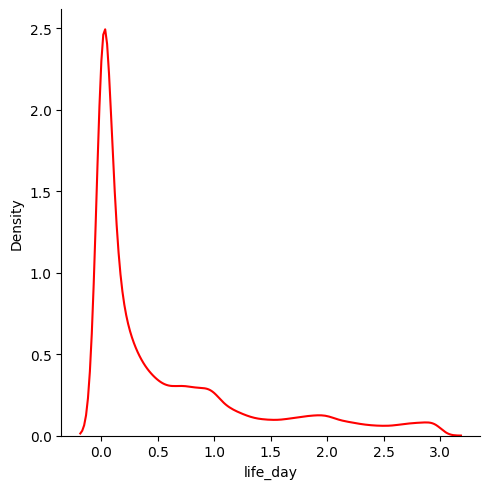

In [224]:
sns.displot(data = iss_vlow,kind="kde", x="life_day", color = 'red')

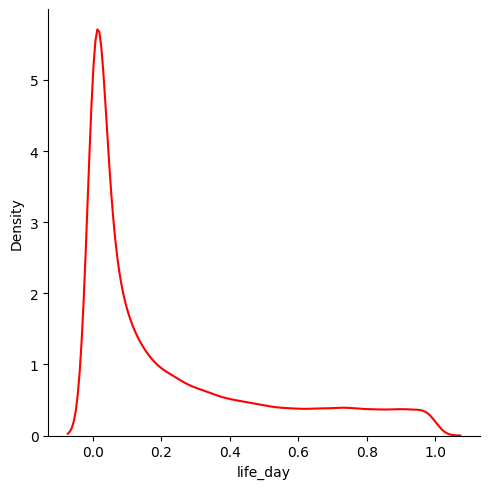

In [225]:
iss_xlow=iss[(iss["life_day"] < 1)]
sns.displot(data = iss_xlow,kind="kde", x="life_day", color = 'red')

In [226]:
iss_xlow

,rc_ty,url,author,closer,auther_is_closer,participants_total,participants_bot,participants_member,participants_contributer,participants_user,...,life_time_sec,first_event_time_sec,first_comment_time_sec,commit_count,comment_count,end,bot_ratio,idle_time,life_day,has_bot
132842,Issue,"""https://github.com/fastai/fastbook/issues/443""",User,User,True,1,0,0,0,1,...,0,-1,-1,0,0,Green,0.000000,0.000000,0.000000,False
132843,Issue,"""https://github.com/fastai/fastbook/issues/442""",User,User,True,1,0,0,0,1,...,0,-1,-1,0,0,Green,0.000000,0.000000,0.000000,False
132844,Issue,"""https://github.com/fastai/fastbook/issues/441""",User,User,True,1,0,0,0,1,...,0,-1,-1,0,0,Green,0.000000,0.000000,0.000000,False
177245,Issue,"""https://github.com/microsoft/TypeScript/issue...",User,User,True,2,0,0,0,2,...,0,-1,-1,0,0,Green,0.000000,0.000000,0.000000,False
177407,Issue,"""https://github.com/microsoft/TypeScript/issue...",User,User,True,1,0,0,0,1,...,0,-1,-1,0,0,Green,0.000000,0.000000,0.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390082,Issue,"""https://github.com/go-gitea/gitea/issues/26940""",User,User,True,4,1,1,0,2,...,86395,-1,85583,0,10,Green,0.250000,0.990601,0.999942,True
133228,Issue,"""https://github.com/fastai/fastbook/pull/16""",Contributer,Member,False,3,1,1,1,0,...,86396,-1,7,1,3,Red,0.333333,0.000093,0.999954,True
587403,Issue,"""https://github.com/TheAlgorithms/Python/pull/...",User,Member,False,2,0,1,0,1,...,86396,-1,86396,1,1,Red,0.000000,1.000000,0.999954,False
429977,Issue,"""https://github.com/beego/beego/pull/4235""",User,User,True,1,0,0,0,1,...,86398,-1,-1,1,0,Green,0.000000,0.000000,0.999977,False


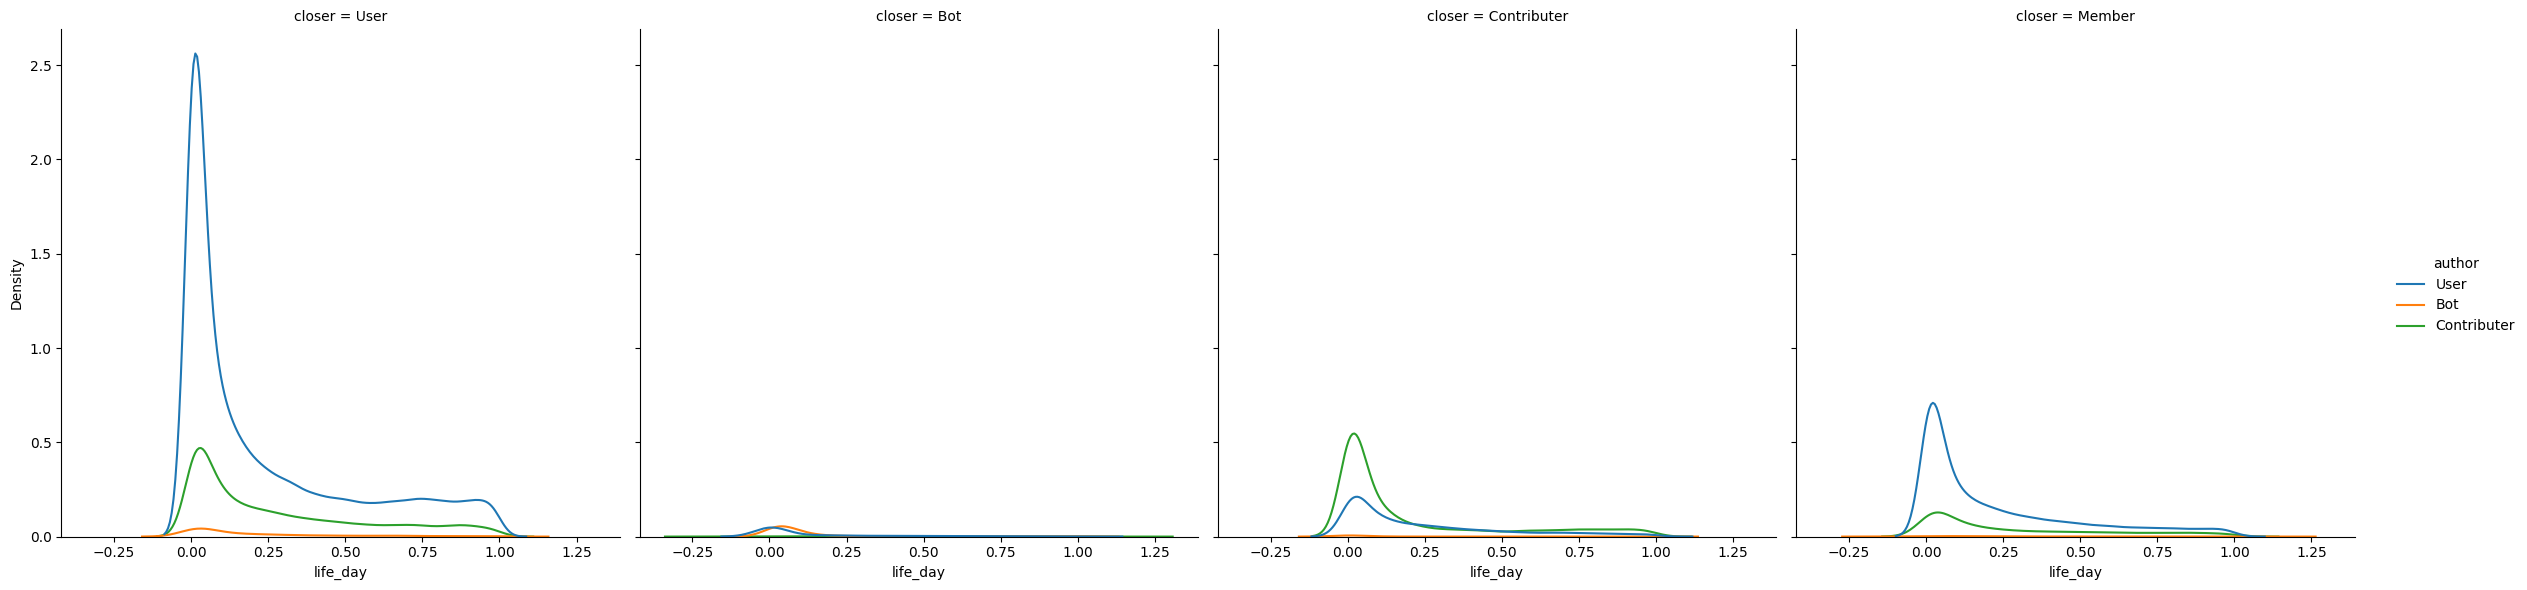

In [227]:
sns.displot(data=iss_xlow,x="life_day", kind="kde",hue="author",col="closer",height=6)

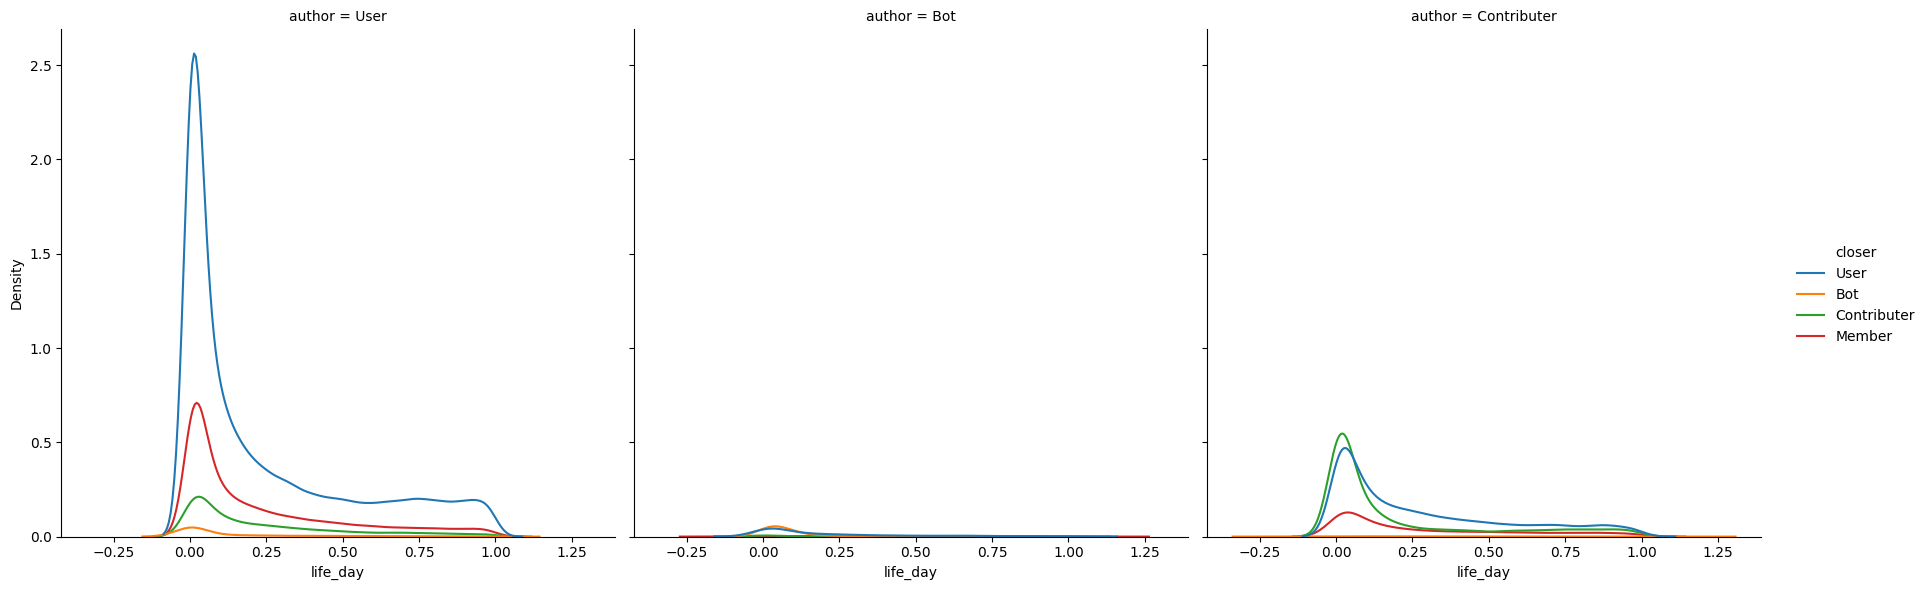

In [228]:
sns.displot(data=iss_xlow,x="life_day", kind="kde",hue="closer",col="author",height=6)

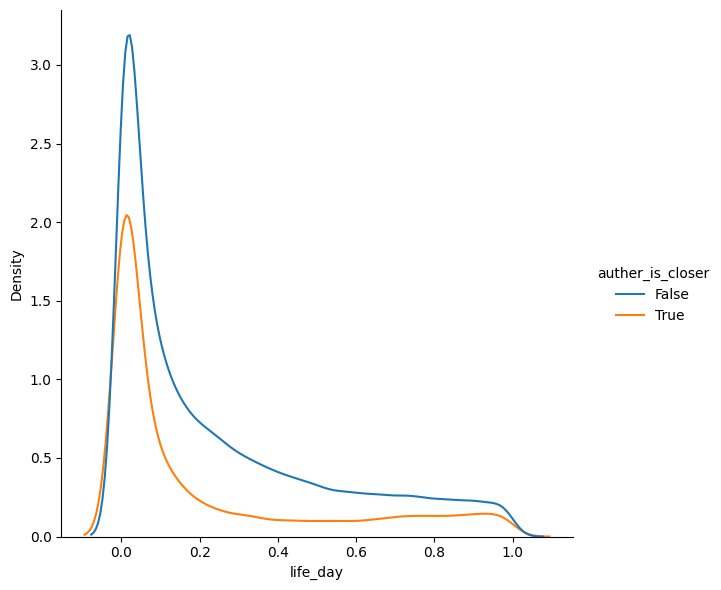

In [229]:
sns.displot(data=iss_xlow, x="life_day", kind="kde",hue="auther_is_closer", height=6)

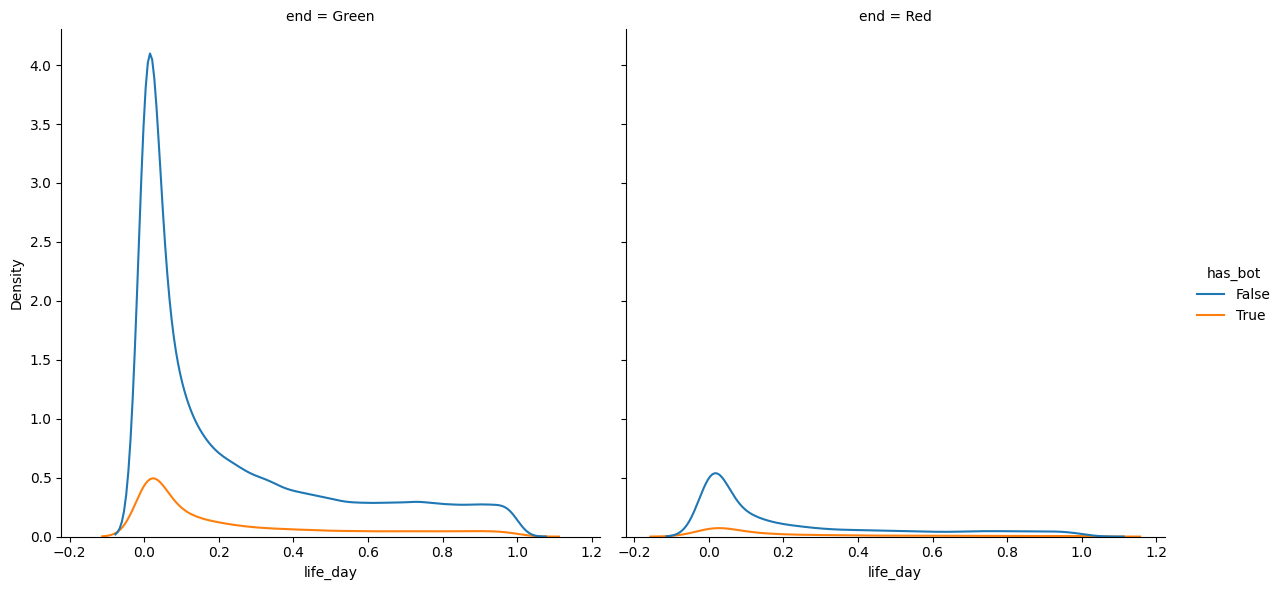

In [231]:
sns.displot(data=iss_xlow, x="life_day", kind="kde",hue="has_bot", height=6,col="end")